# Plot CMIP ZOS fields

In [1]:
import os
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('../code/')
import mod_loc as loc
import mod_postpro as pp

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
python_data_dir = '../outputs/'
#ncl_data_dir = '../../Data_Proj/Data_CMIP5/CorrectedZOS_TS_yearly/'
#ar5_data_dir = '../../Data_Proj/Data_AR5/Ocean/1x1_glob/'

In [4]:
def plot_all_models(ds):
    nb_cols = 3
    nb_rows = int(np.ceil(len(ds.model)/nb_cols))
    fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,nb_rows*3))

    for idx, mod in enumerate(ds.model):
        ds['CorrectedReggrided_zos'].isel(time=-1,model=idx).plot(
            ax=axes[int(idx/nb_cols),idx%nb_cols])
    fig.tight_layout()

def plot_all_models2(ds):
    '''Use faceting feature from xarray'''
    cbar_kwargs = {'orientation': 'horizontal','label': 'cm', 'pad': 0.05}
    ds.CorrectedReggrided_zos.isel(time=-1).plot(x='lon', y='lat', col='model', 
                                                    col_wrap=4, robust=True, 
                                                    cbar_kwargs=cbar_kwargs)

### Look at CMIP5 fields

In [6]:
cmip5_zos = pp.read_zos_ds(python_data_dir, 'cmip5', 'rcp85')

In [7]:
# How many models?
len(cmip5_zos.model)

30

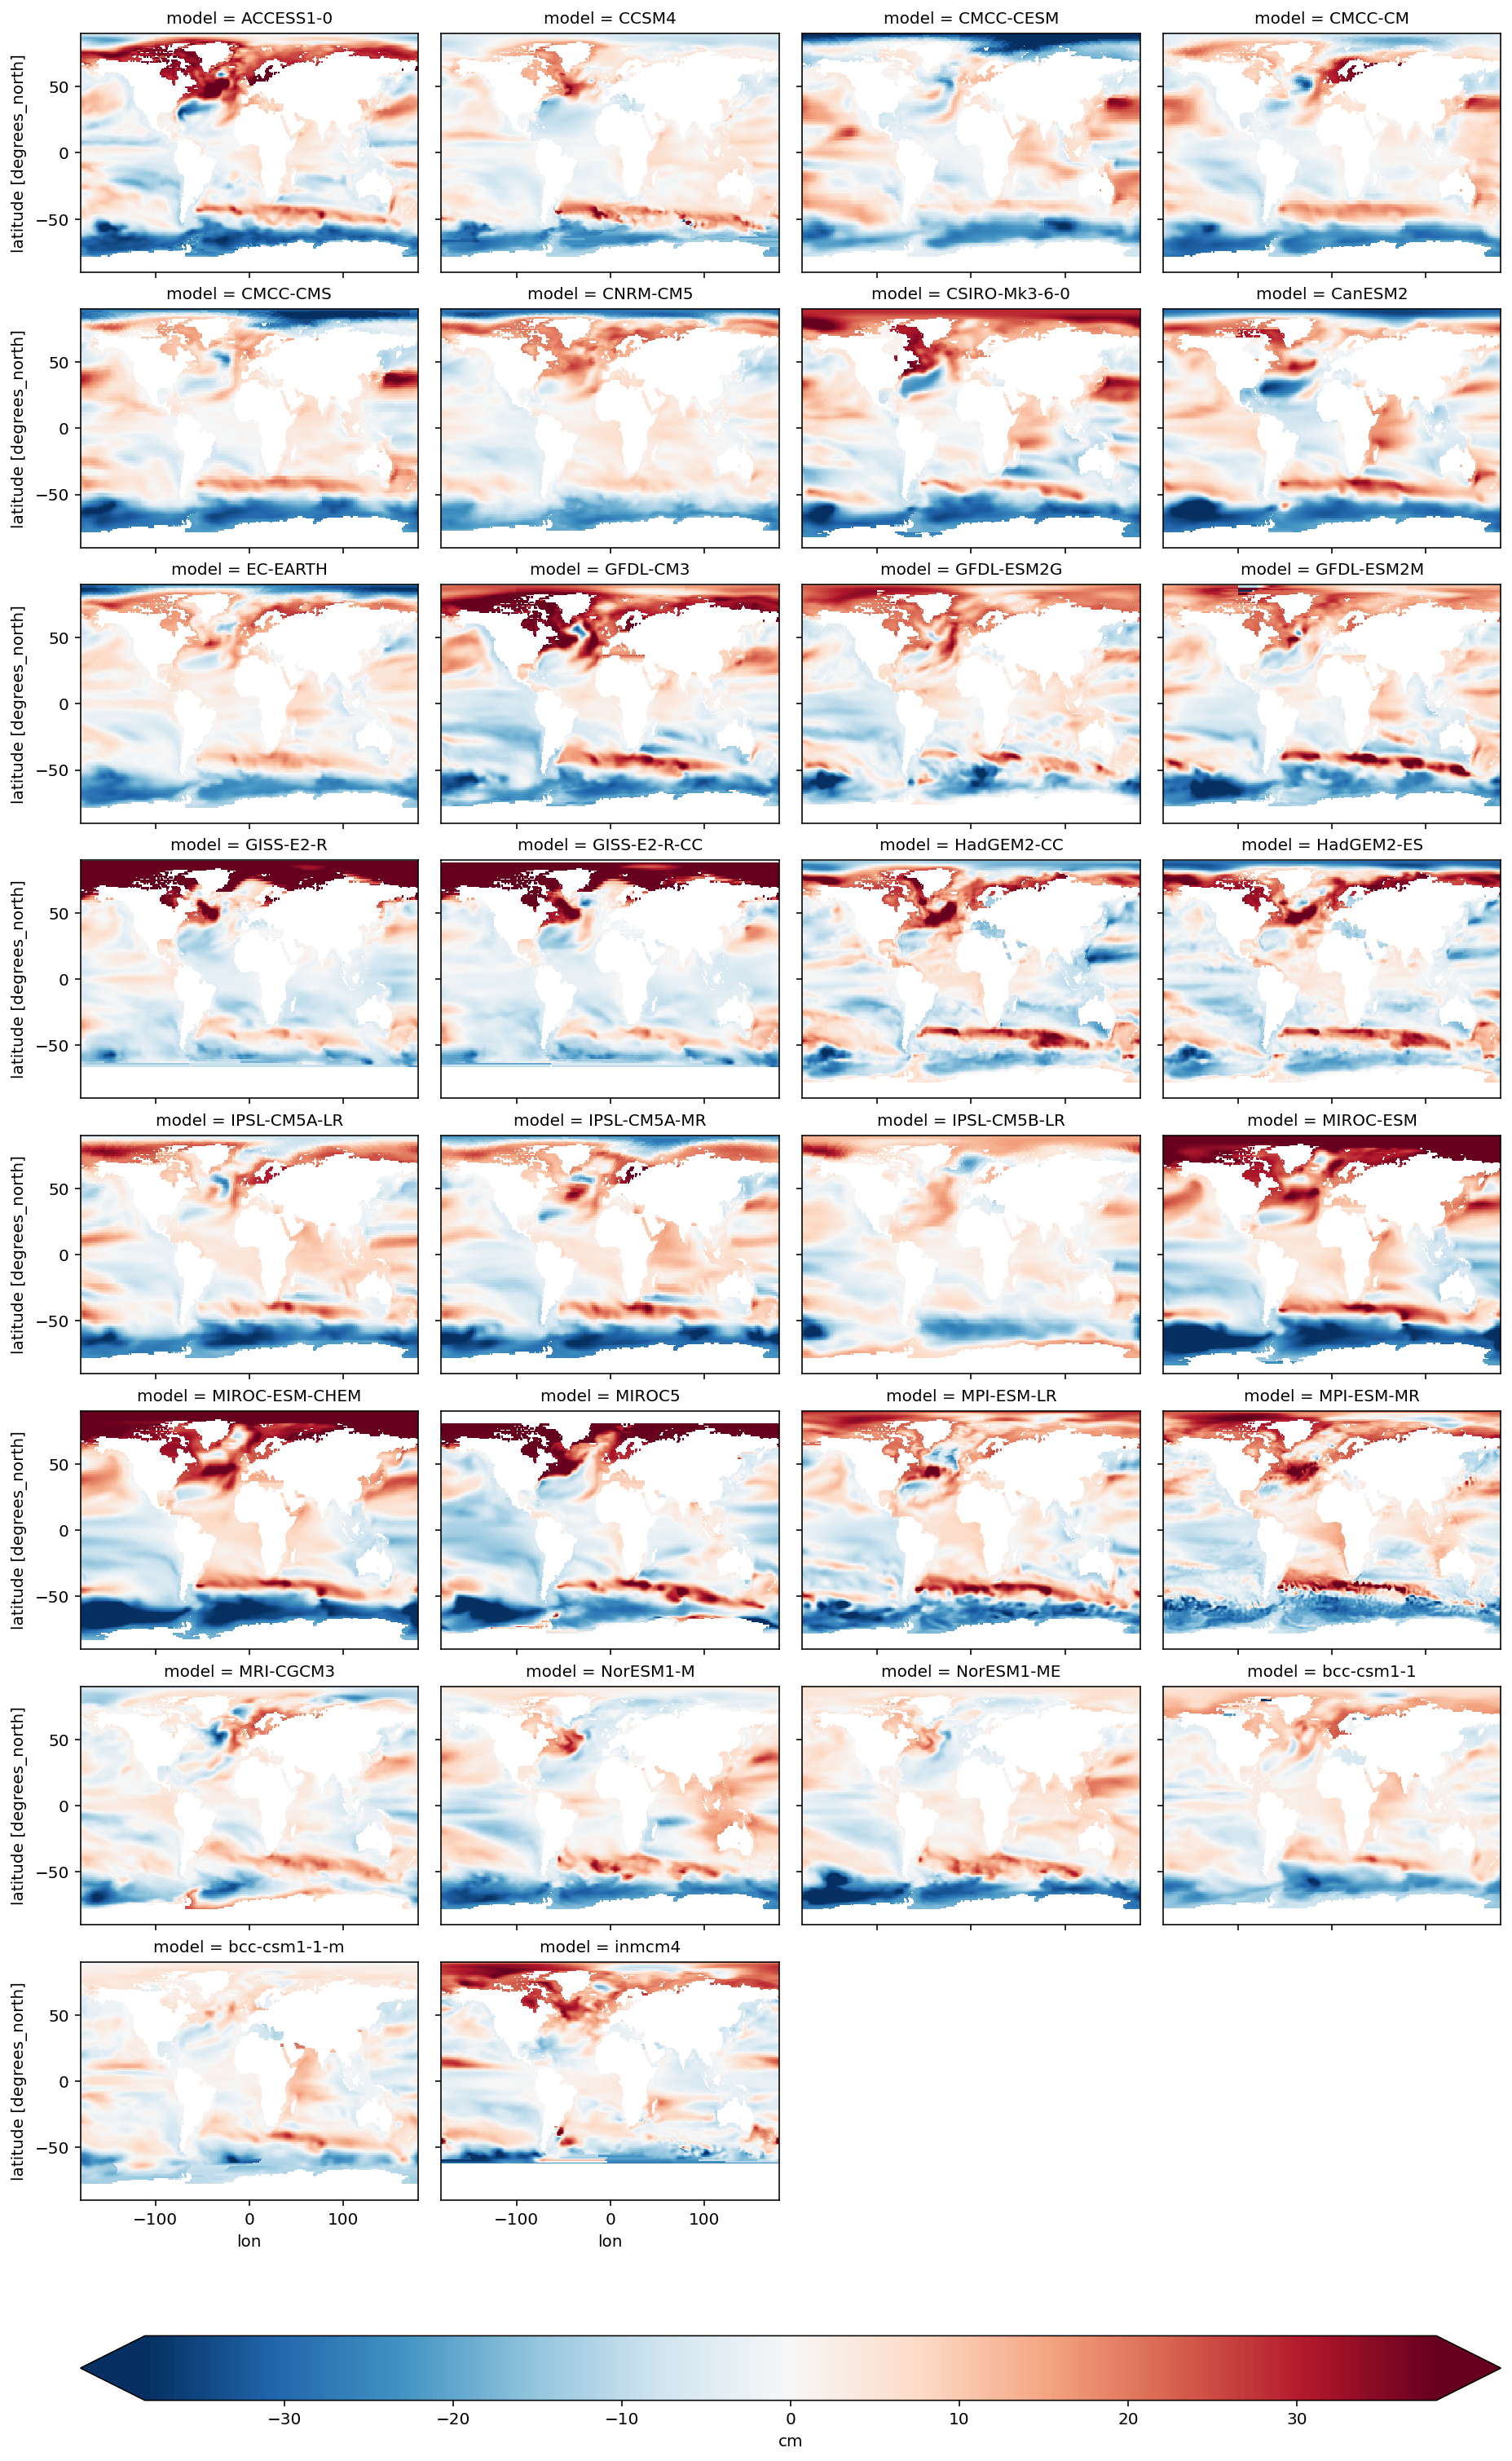

In [8]:
plot_all_models2(cmip5_zos)

### Compute the mean pattern

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


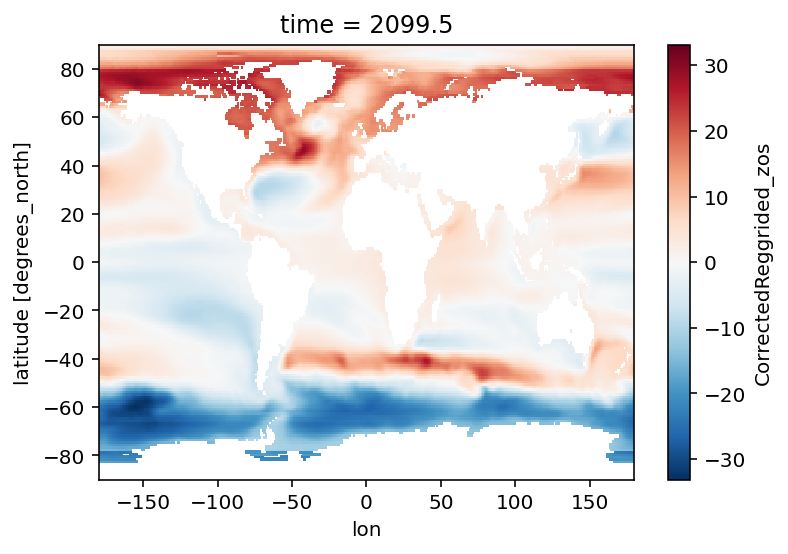

In [14]:
cmip5_zos_m = cmip5_zos['CorrectedReggrided_zos'].mean(dim='model')
cmip5_zos_m.sel(time=2099.5).plot()

### Look at CMIP6 fields

In [27]:
cmip6_zos = pp.read_zos_ds(python_data_dir, 'cmip6', 'ssp585')

In [19]:
# How many models?
len(cmip6_zos.model)

30

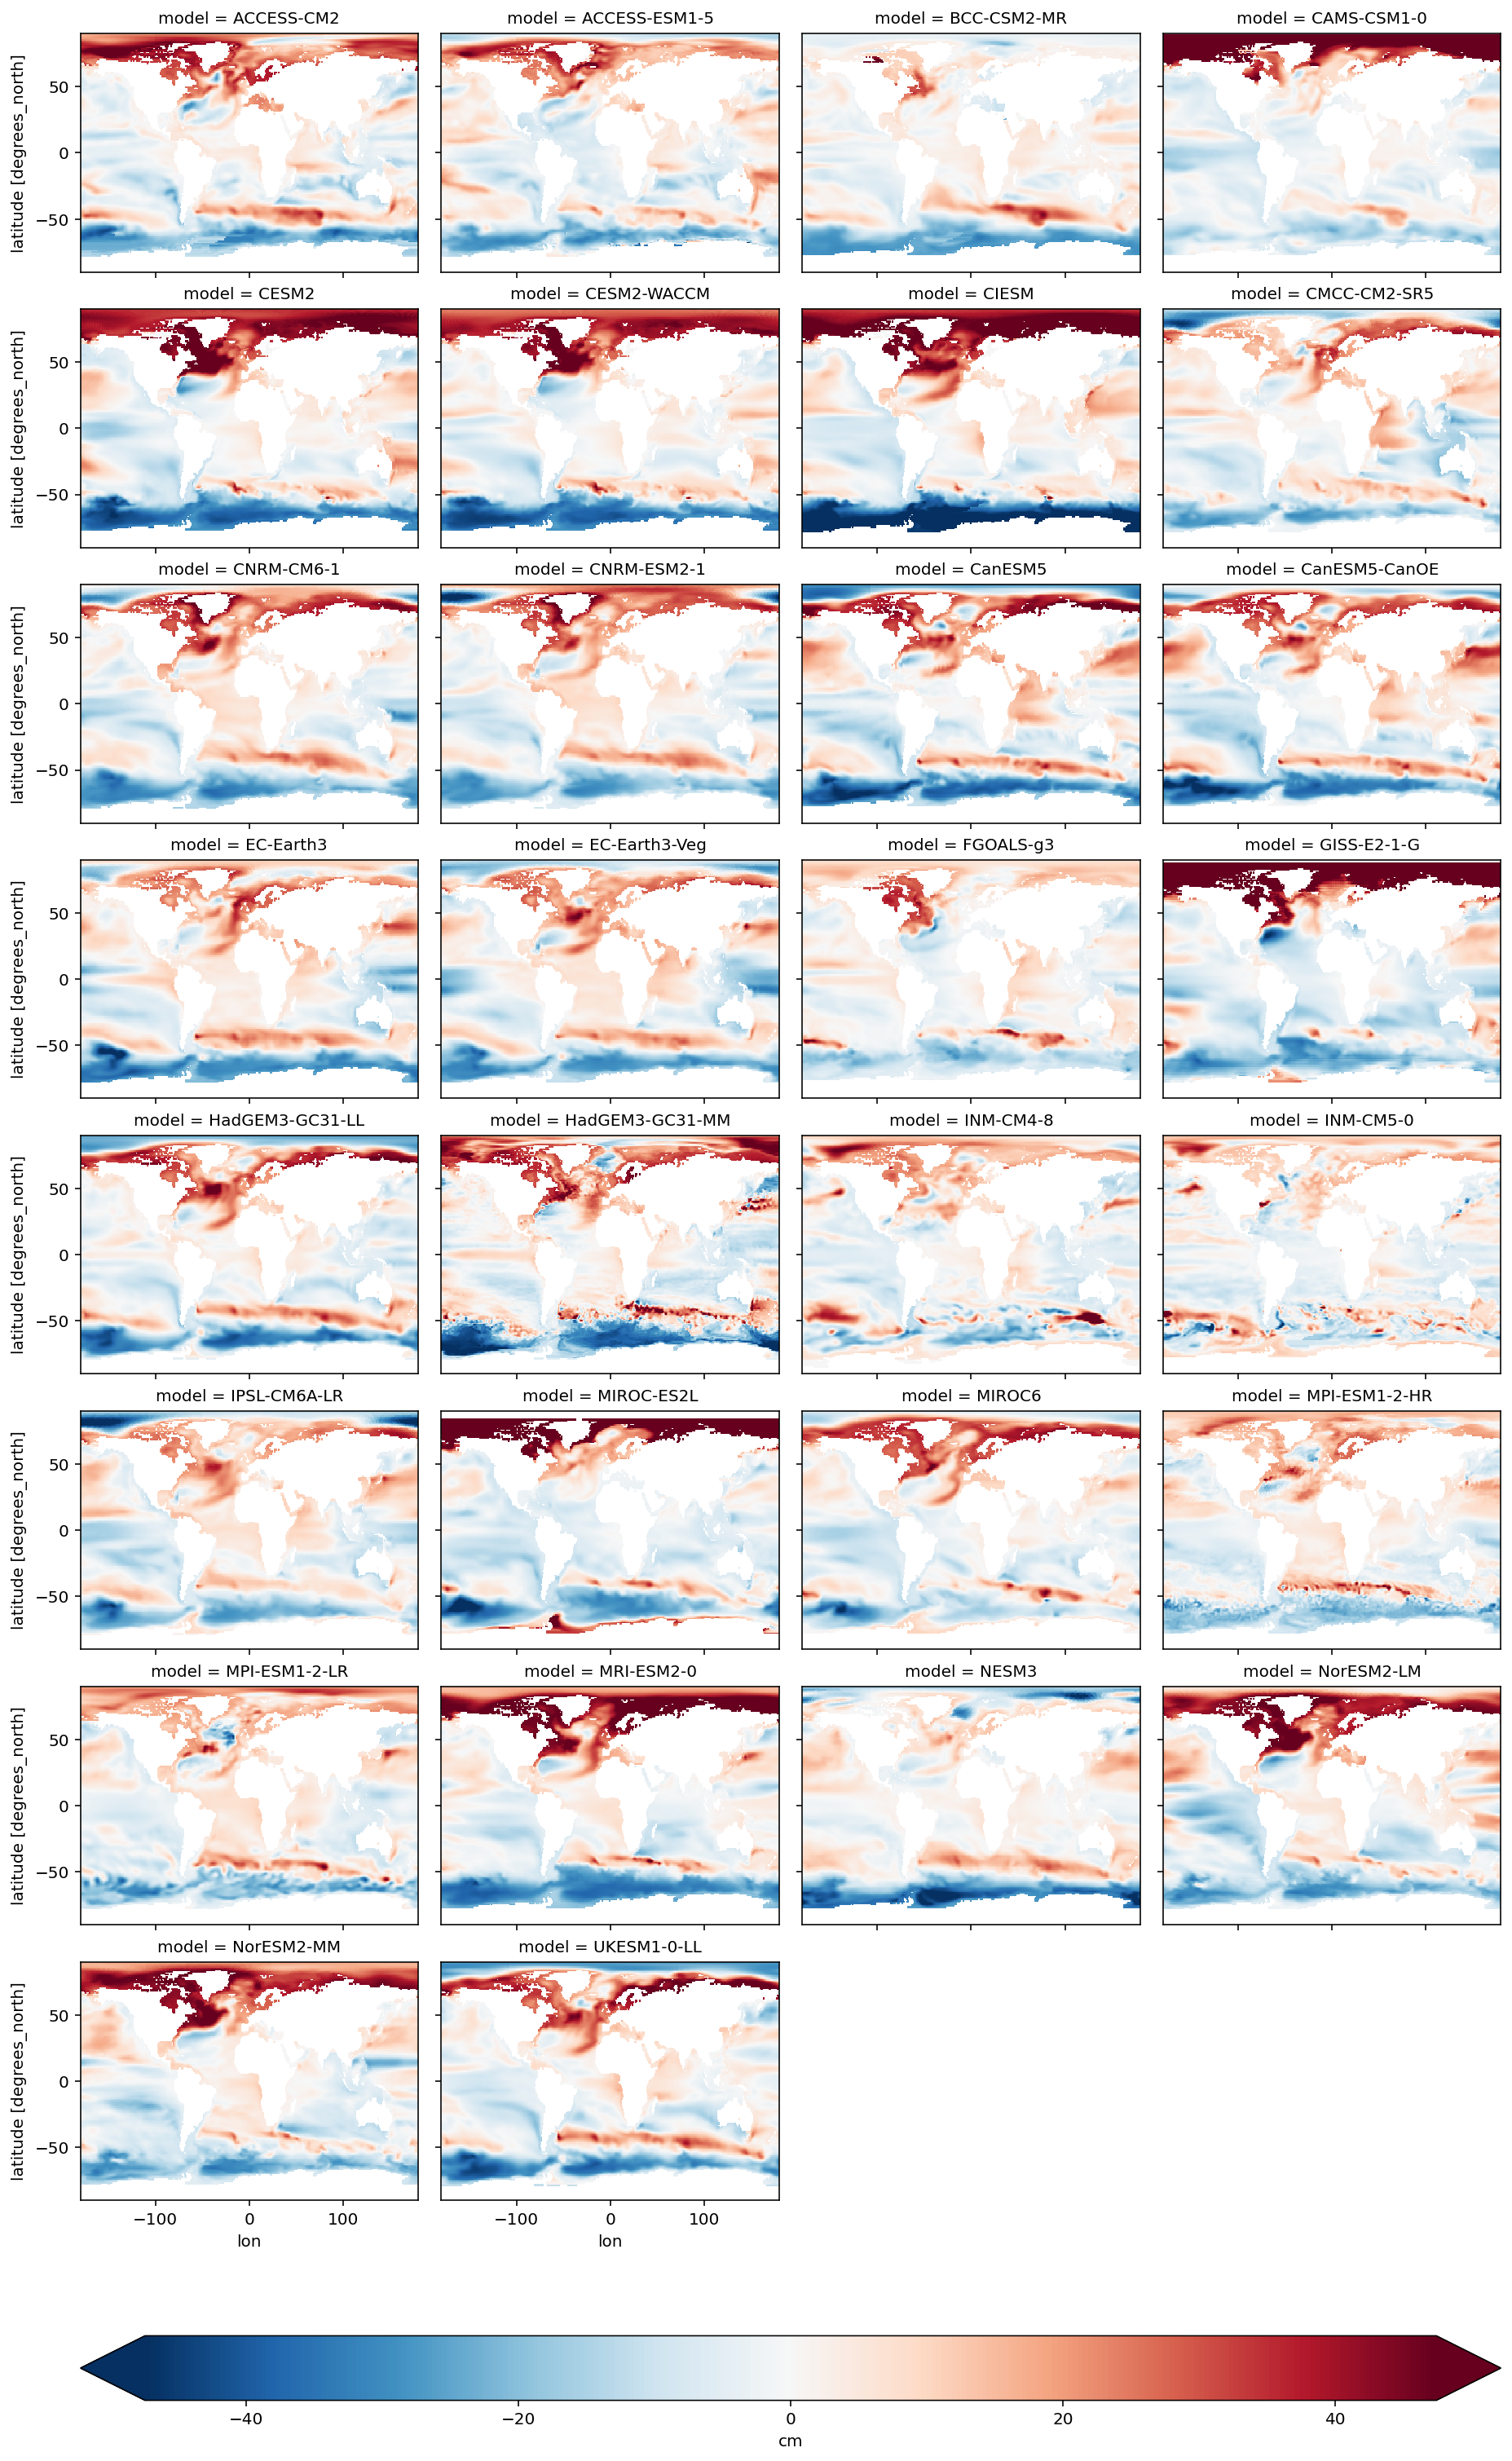

In [20]:
plot_all_models2(cmip6_zos)

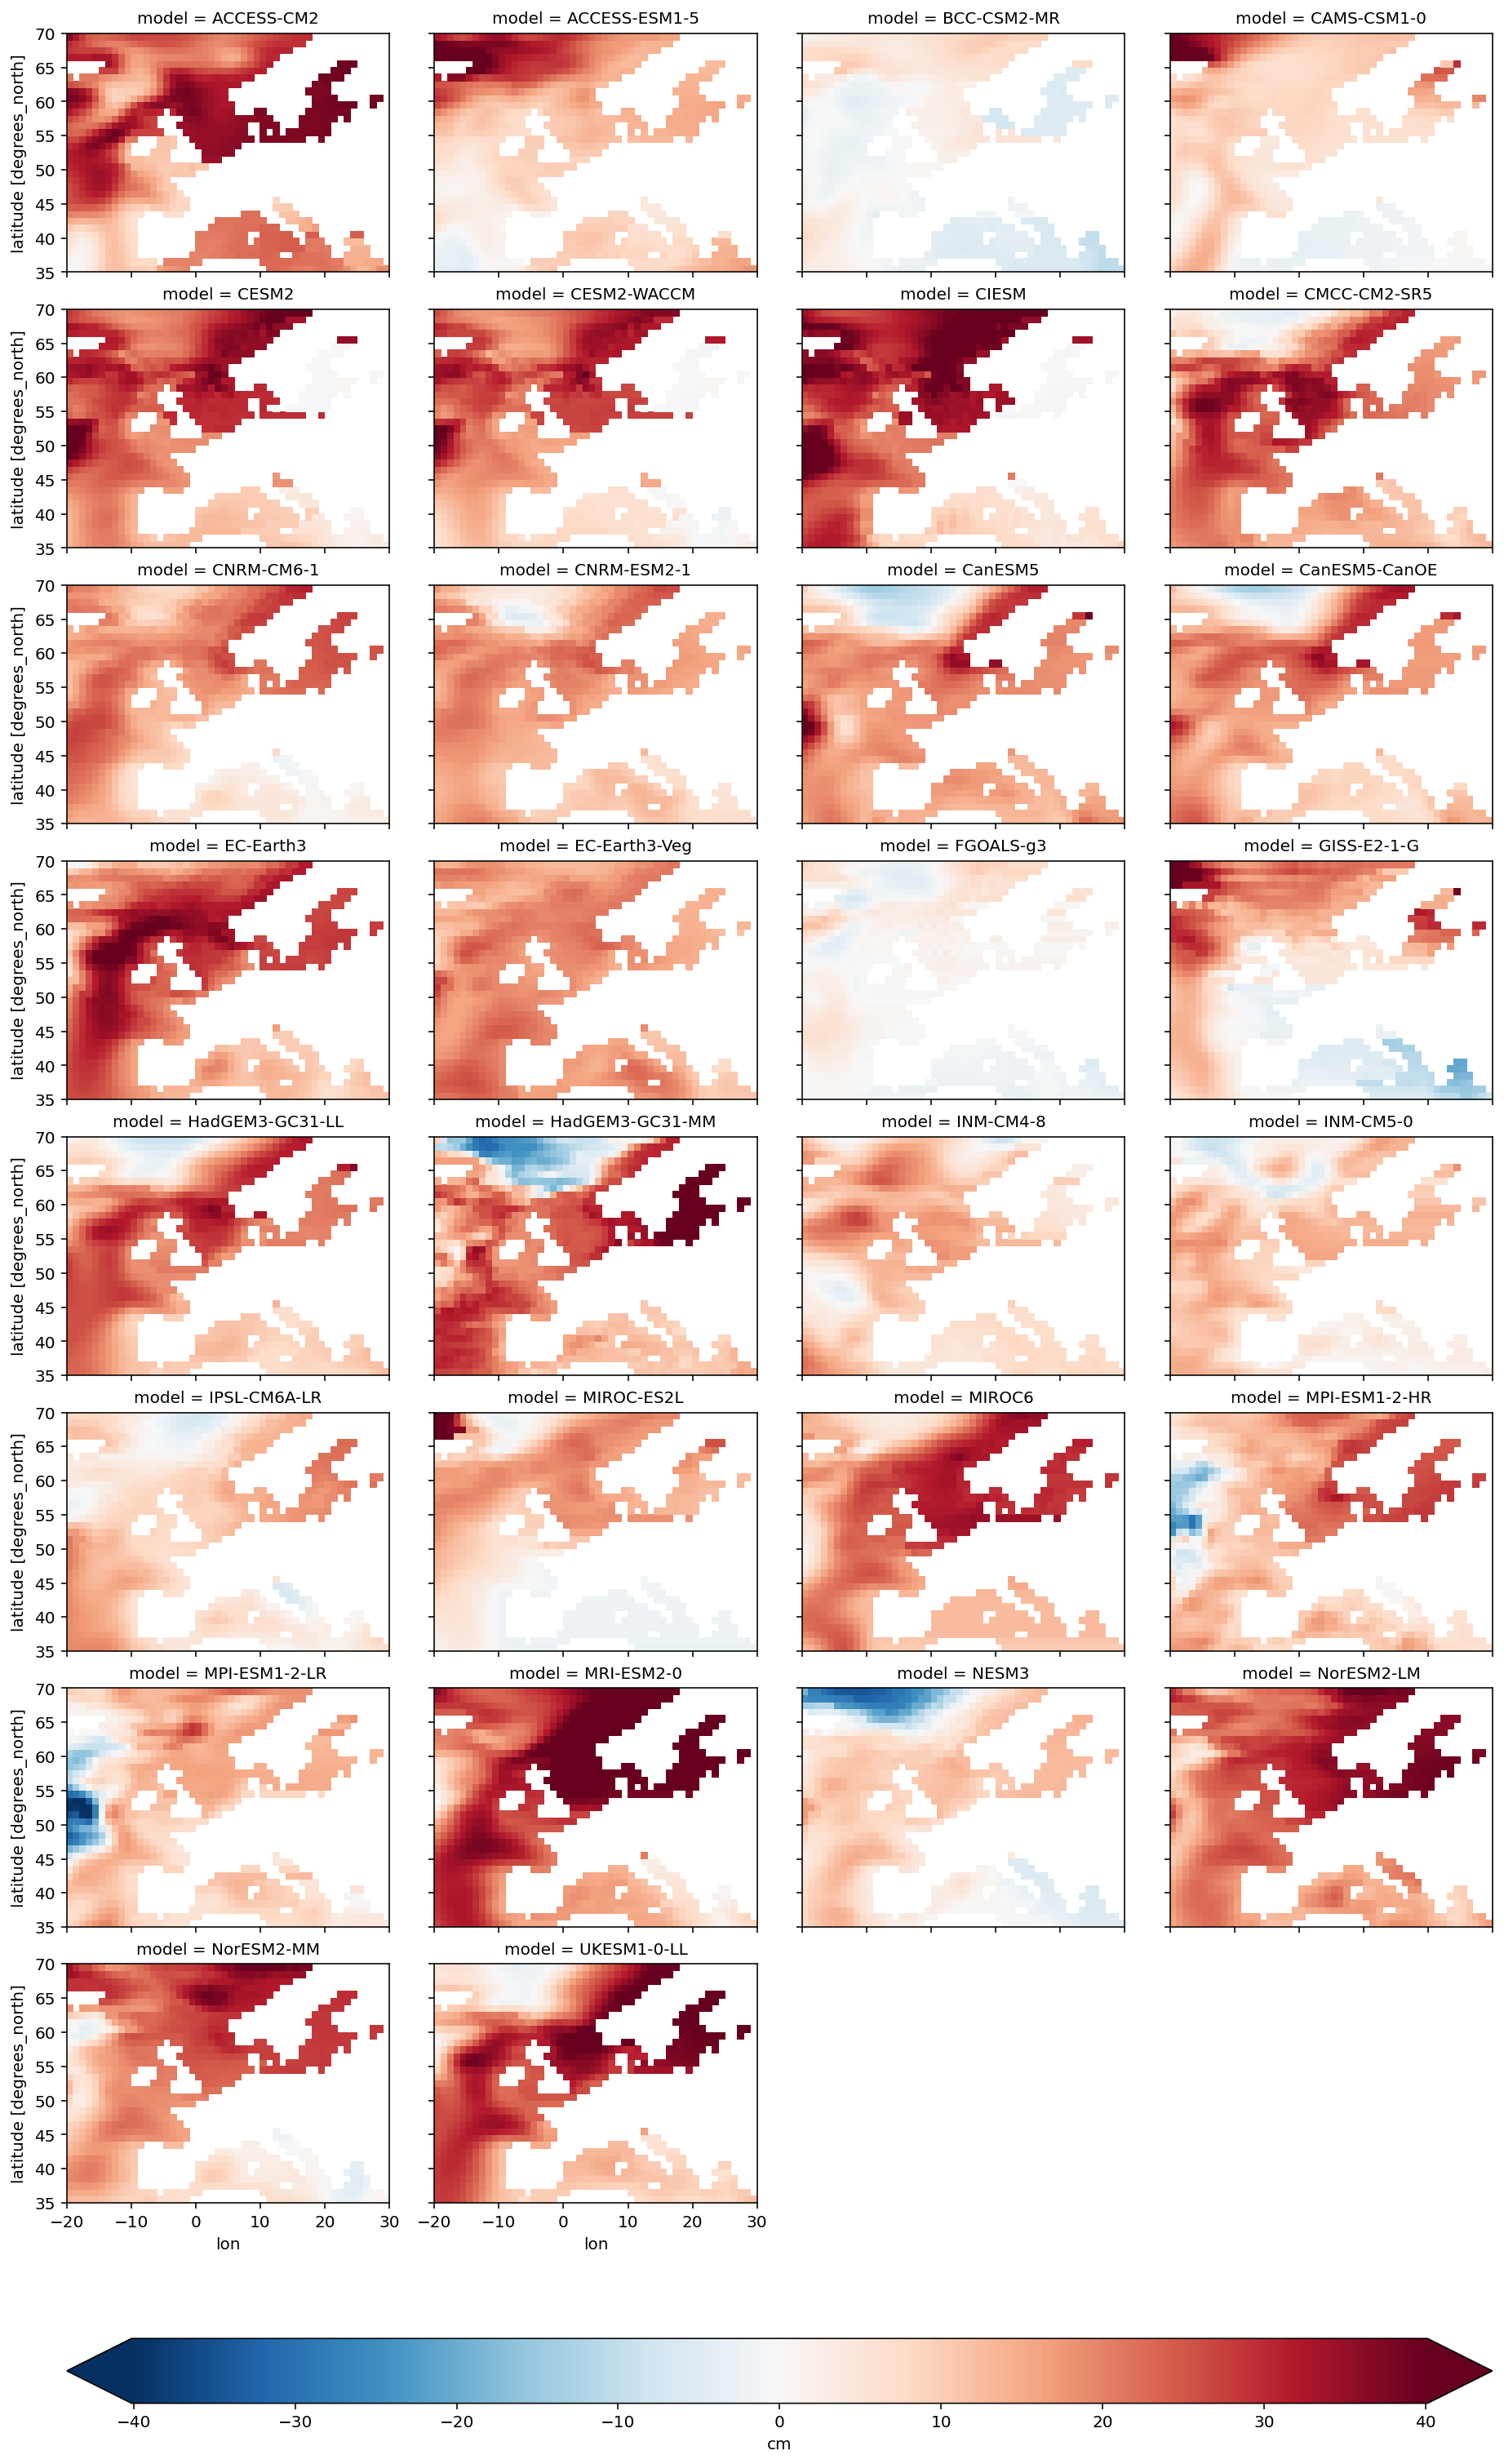

In [21]:
plot_all_models2(cmip6_zos.sel(lat=slice(35,70), lon=slice(-20,30)))

### Compute the mean pattern

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


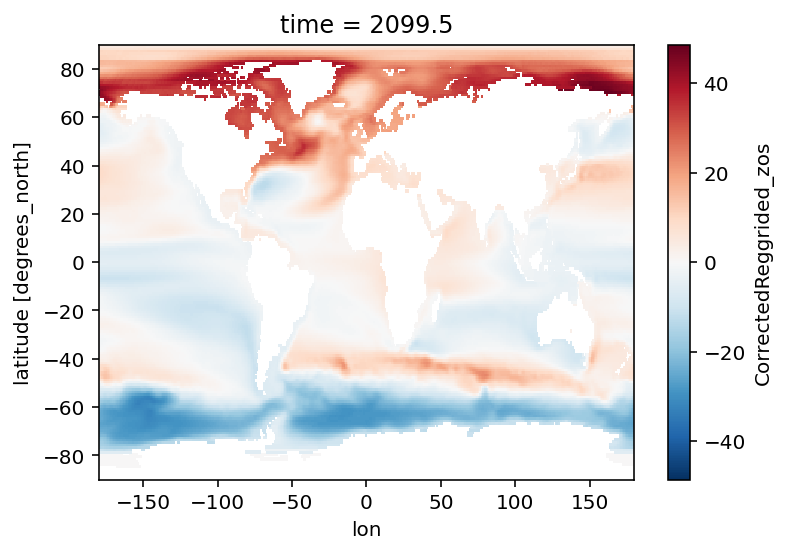

In [22]:
cmip6_zos_m = cmip6_zos['CorrectedReggrided_zos'].mean(dim='model')
cmip6_zos_m.sel(time=2099.5).plot()

### Compare the mean sea level patterns from cmip5 and cmip6

In [23]:
diff_ds = cmip6_zos_m - cmip5_zos_m

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


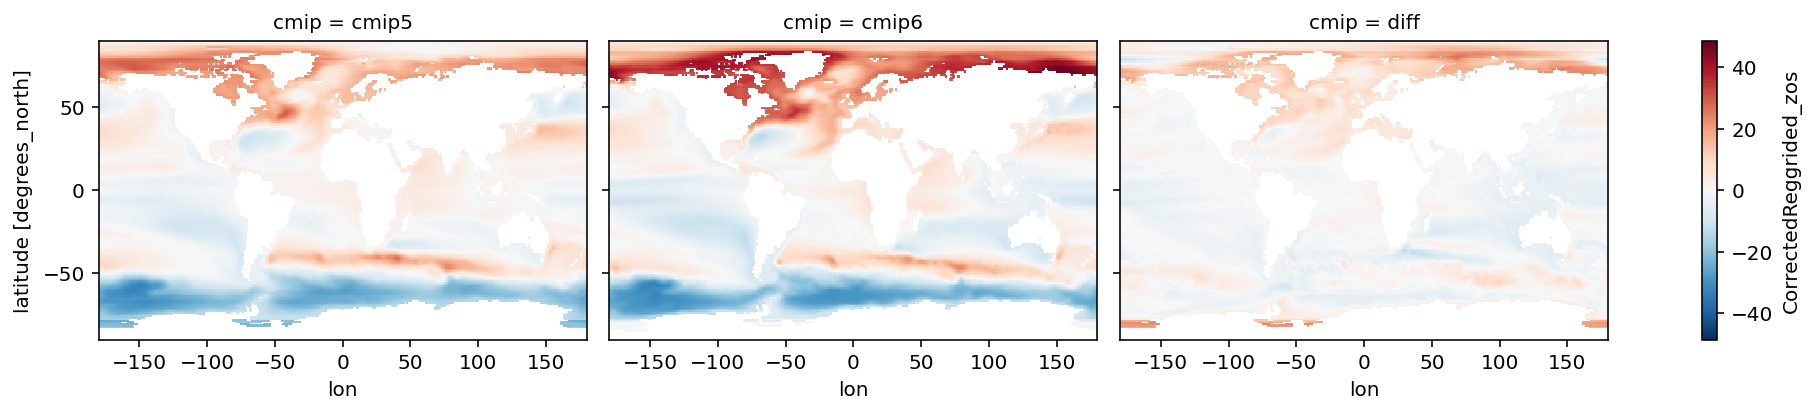

In [24]:
new_dim = xr.DataArray(['cmip5', 'cmip6', 'diff'], dims='cmip', name='cmip')
concat = xr.concat([cmip5_zos_m, cmip6_zos_m, diff_ds], dim=new_dim)
concat.sel(time=2099.5).plot(col='cmip', figsize=(14,3))

#plt.savefig('../figures/zos_comp_rcp85_ssp585_world.pdf', dpi=150)

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


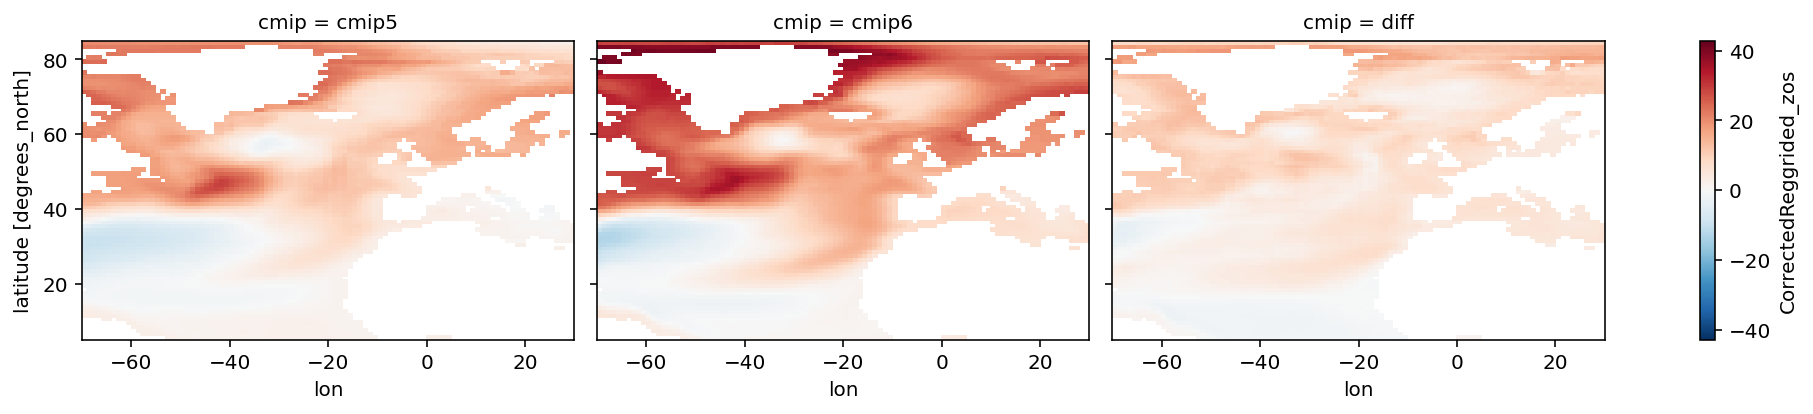

In [25]:
concat.sel(time=2099.5, lat=slice(5,85), lon=slice(-70,30)).plot(col='cmip', figsize=(14,3))

#plt.savefig('../figures/zos_comp_rcp85_ssp585_NorthAtlantic.pdf', dpi=150)

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


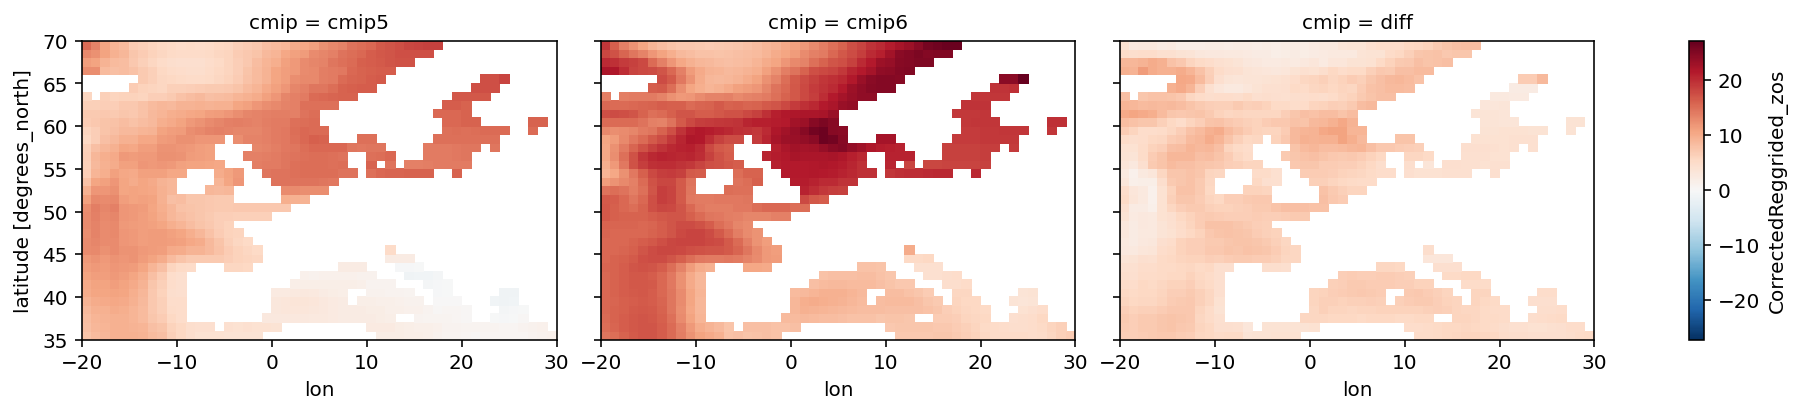

In [26]:
concat.sel(time=2099.5, lat=slice(35,70), lon=slice(-20,30)).plot(col='cmip', figsize=(14,3))

#plt.savefig('../figures/zos_comp_rcp85_ssp585_europe.pdf', dpi=150)